In [56]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = datasets.fetch_california_housing(as_frame = True)
import numpy as np
# print(dataset.frame.DESCR)

## Question 1: 
- Load an original dataset, 
- comment on this dataset (what are the features, the dimensions of the problem, 
- how does the correlation matrix looks like)

In [57]:
dataset.frame.shape

(20640, 9)

In [58]:
cols = dataset.frame.columns
print(cols)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
- MedInc        median income in block group
- HouseAge      median house age in block group
- AveRooms      average number of rooms per household
- AveBedrms     average number of bedrooms per household
- Population    block group population
- AveOccup      average number of household members
- Latitude      block group latitude
- Longitude     block group longitude

In [59]:
dataset.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Even billionaires don't often have an average of 141 rooms in their mansions. We remove the 99.5% percentile

In [60]:
type(dataset)

sklearn.utils._bunch.Bunch

In [61]:
# dfnew = dataset.frame.copy()
# for i in range(len(cols)-1):
#     dfnew = dfnew[dfnew[cols[i]] < dfnew[cols[i]].quantile(.999)]
# print(f"Removal of {np.round((len(dataset.frame)-len(dfnew))/len(dataset.frame), 3)}% of entries", )
# dataset = dfnew
dataset = dataset.frame

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

First let us consider the correlation matrix

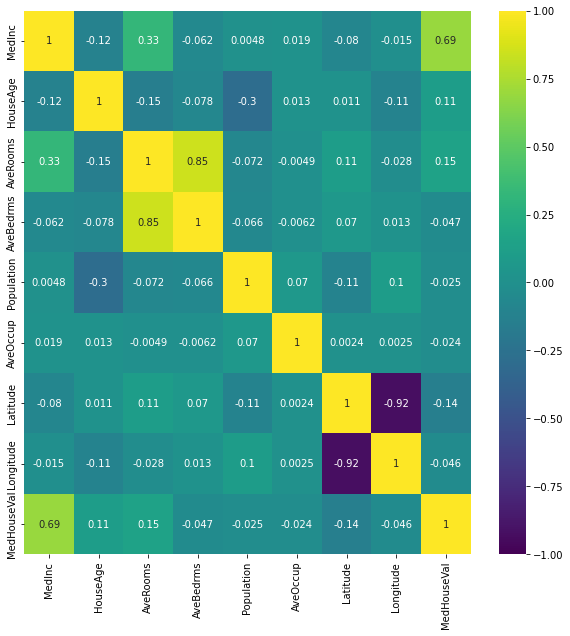

In [63]:
plt.figure(figsize=(10, 10))
cor_matrix = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap = sns.color_palette('viridis', as_cmap=True))

Except for two pairs of variables, there seems to be no strong correlation between the variables. 

We now study the relationships of the variables (excluding one of each paris, _AveRooms_ and _Latitude_)

In [64]:
substudy = dataset.drop(["Longitude", "AveRooms"], axis=1)
cols = substudy.columns
cols

Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Latitude',
       'MedHouseVal'],
      dtype='object')

Consider the general distributions of the data

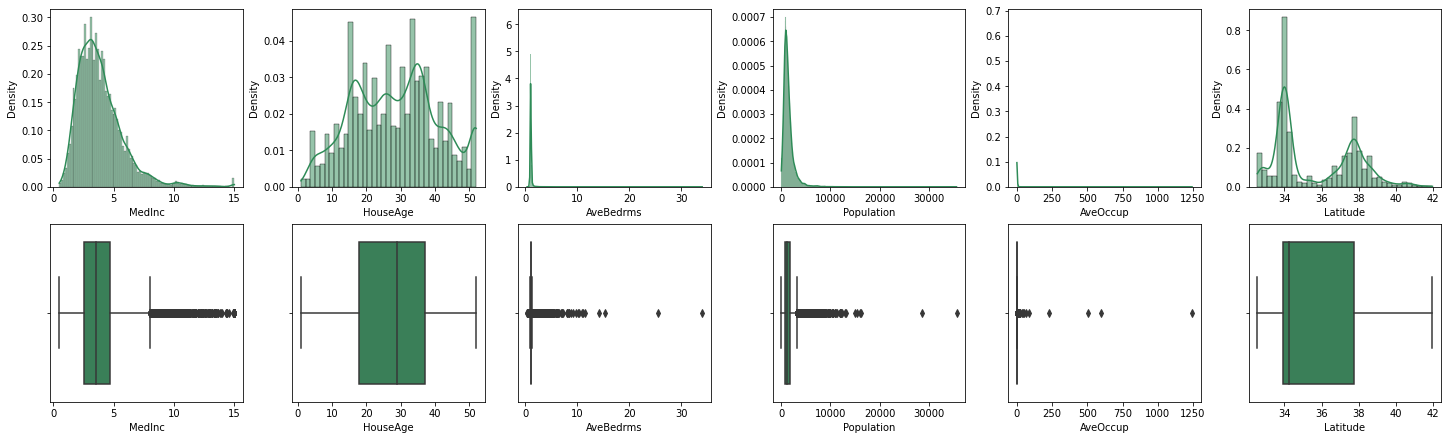

In [65]:
fig, ax = plt.subplots(2, 6, constrained_layout=True, figsize=(20, 6))
for i in range(len(cols)-1):
    sns.histplot(data = substudy, x= cols[i], ax = ax[0, i], stat = "density", kde = True, color='seagreen')
    sns.boxplot(data=substudy, x=cols[i], ax=ax[1, i], color='seagreen');

Now regress along y-label

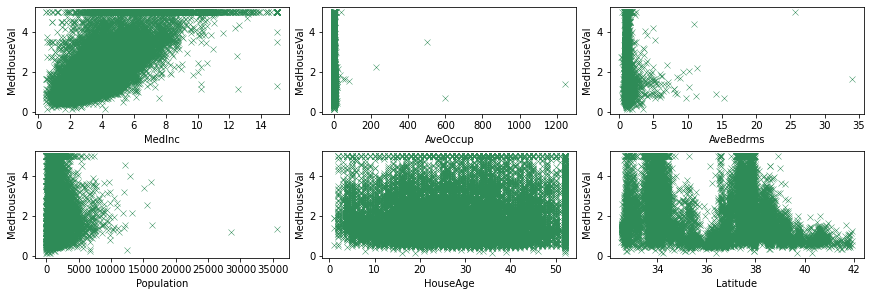

In [66]:
fig, ax = plt.subplots(2, 3, constrained_layout=True, figsize=(12, 4))
for i in range(len(cols) - 1):
  sns.scatterplot(data = substudy, x = cols[i], y = cols[-1], marker="x", ax = ax[i%2,i%3], color='seagreen')

Latitude seems to be bimodal indicating 2 areas. Let us further explore this.

In [69]:
cols = dataset.columns

AttributeError: 'DataFrame' object has no attribute 'frame'

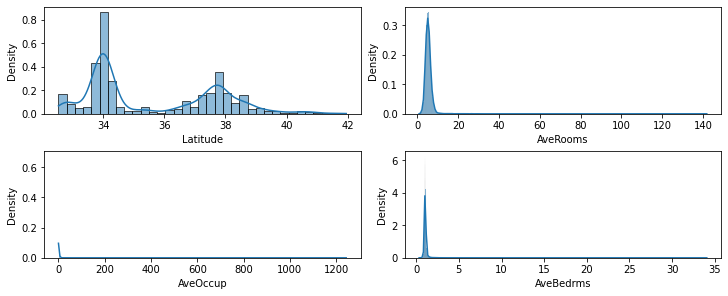

In [70]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(10, 4))
sns.histplot(data=dataset, x=cols[-2], kde=True, stat='density', ax=ax[0,0])
sns.histplot(data=dataset, x=cols[-3], kde=True, stat='density', ax=ax[1,0])
sns.histplot(data=dataset, x='AveRooms', kde=True, stat='density', ax=ax[0,1])
sns.histplot(data=dataset, x='AveBedrms', kde=True, stat='density', ax=ax[1,1]);

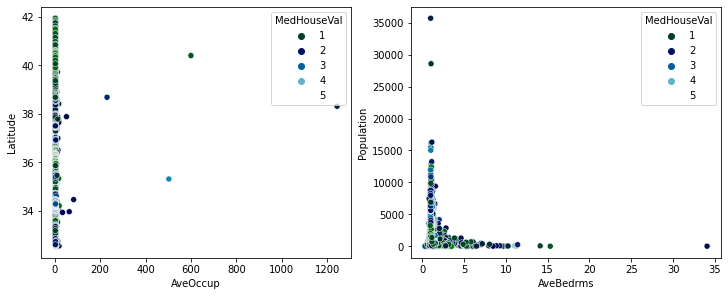

In [71]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 4))
sns.scatterplot(data=dataset, x=cols[-3], y=cols[-2], hue=cols[-1], palette= sns.color_palette('ocean', as_cmap=True), ax=ax[0]);
sns.scatterplot(data=dataset, x=cols[2], y=cols[3], hue=cols[-1], palette= sns.color_palette('ocean', as_cmap=True), ax=ax[1]);

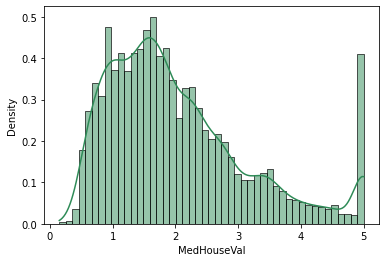

In [ ]:
sns.histplot(data=dataset, x=cols[-1], kde=True, stat='density', color='seagreen');

Normalise the data and split 80-20 into train-test. Then add a column for the intercept

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

cols = dataset.columns
df = pd.DataFrame(StandardScaler().fit_transform(dataset),columns = dataset.columns)
X = np.asarray(df)[:,0:len(cols) - 1]
y = np.asarray(df)[:,len(cols) - 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)
X_train = np.insert(X_train, 0, np.ones(X_train.shape[0]), axis=1)
X_test = np.insert(X_test, 0, np.ones(X_test.shape[0]), axis=1)

n, d = X_train.shape
print(n,d)

16512 9


Consider contributions of each feature

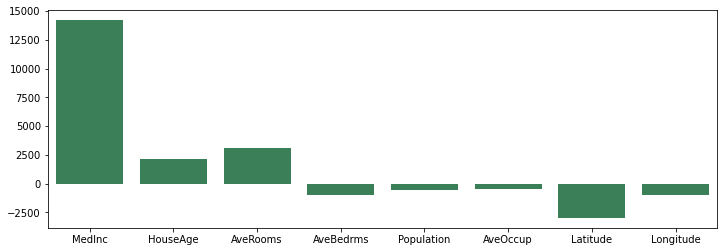

In [73]:
u = X.transpose().dot(y)
plt.figure(figsize=(12,4))
sns.barplot(x=cols[:-1], y=u.flatten(), color='seagreen');

## Question 2


Minimise $$ F(\theta) = \frac{1}{n}||Y-X\theta||_{2}^{2} + \lambda||\theta||_{2}^{2} = \frac{1}{n}\sum_{i=1}^{n} (Y_i - X\theta_i)^2 + \lambda\sum{\theta_{i}^2}$$
which has gradient
$$ \nabla{F} = \frac{1}{n}X^{T}(Y-X\theta) + \lambda\theta

- Implement gradient descent for regression ($\ell_2$-loss) with a small ridge penalty. 

In [74]:
gradient_ridge = lambda X, err, theta, lmbda: (1/X.shape[0]) * np.dot(X.T, err) + 1*lmbda*theta
loss = lambda X, y, theta: np.mean((np.dot(X,theta)-y)**2)

def GD_ridge(X, y, niter, step=0.001, penalty=0):
    theta = np.zeros(X.shape[1])
    loss_evol = np.zeros(niter)
    for i in range(niter):
        error_k = np.dot(X, theta) - y
        grad = gradient_ridge(X, error_k, theta, penalty)
        theta = theta - step* (grad/np.linalg.norm(grad))
        loss_evol[i] = loss(X, y, theta)
    return theta, loss_evol


In [75]:
niter = 200
steps = [1/10**i for i in range(1, 5)] + [0.25]
penalty = 0.0001
loss_evol = np.zeros((niter, len(steps)))
theta = np.zeros((len(steps), X_train.shape[1]))

for i in range(len(steps)):
    s = steps[i]
    th, loss_evol[:, i] = GD_ridge(X_train, y_train, niter, step=s, penalty=penalty)
    theta[i] = th[-1]

- Display the convergence rate on the training loss for several fixed step sizes. 

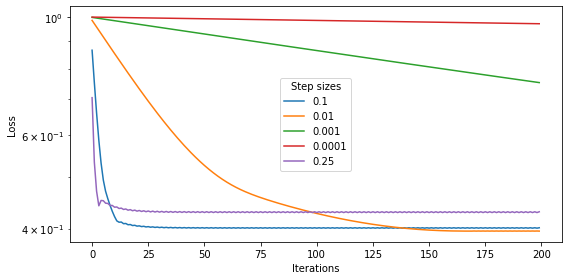

In [76]:
loss_evol = pd.DataFrame(loss_evol, columns=steps)

plt.clf
plt.figure(figsize=(8,4), tight_layout=True)
plt.plot(loss_evol, label=steps)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.yscale('log')
plt.legend(title='Step sizes');

### Question 3: 
What is the optimal step choice ? How does this compare with the theory ?

For a number of different step sizes:

In [77]:
niter = 200
step = np.linspace(start=0.005, stop=0.5, num=50)
penalty = 0.0001

loss_evolution = np.zeros(len(step))
theta = np.zeros((X_train.shape[1], len(step)))
train_loss = np.zeros(len(step))
test_loss = np.zeros(len(step))

for i in range(len(step)):
    s = step[i]
    theta[:, i], loss_evolution = GD_ridge(X_train, y_train, niter, s, penalty)
    train_loss[i] = loss_evolution[-1]
    test_loss[i] = loss(X_test, y_test, theta[:, i])

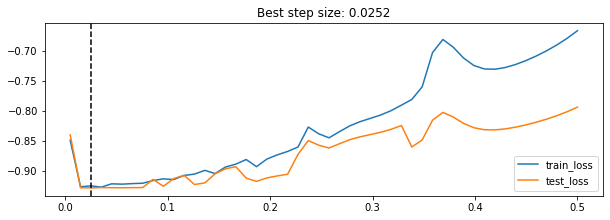

In [78]:
min_i = test_loss.argmin()

plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.plot(step, np.log(train_loss), label='train_loss')
plt.plot(step, np.log(test_loss), label= 'test_loss')
plt.axvline(x=step[min_i], linestyle='dashed', c='k')
plt.title(f'Best step size: {np.round(step[min_i], 4)}')
plt.legend();

In [79]:
tau = 2/np.linalg.norm(X_train,2)
tau

0.010576106495206149

The optimal step choice should be 0.011. 
This corresponds closely to the results I observe where optimal step size is at 0.02

## Question 4
Show the regression performance on the test set as the ridge penalty changes. 

In [80]:
niter = 300
penalties = np.linspace(start=0.00, stop=0.025, num=50)
step = 0.011

loss_evolution = np.zeros(len(penalties))
theta = np.zeros((X_train.shape[1], len(penalties)))
train_loss = np.zeros(len(penalties))
test_loss = np.zeros(len(penalties))

for i in range(len(penalties)):
    p = penalties[i]
    theta[:, i], loss_evolution = GD_ridge(X_train, y_train, niter, step, penalty=p)
    train_loss[i] = loss_evolution[-1]
    test_loss[i] = loss(X_test, y_test, theta[:, i])


In [81]:
explanatory = cols[:-1]
explanatory = list(np.insert(explanatory, 0, "Intercept"))
theta = pd.DataFrame(theta.T, columns=explanatory)

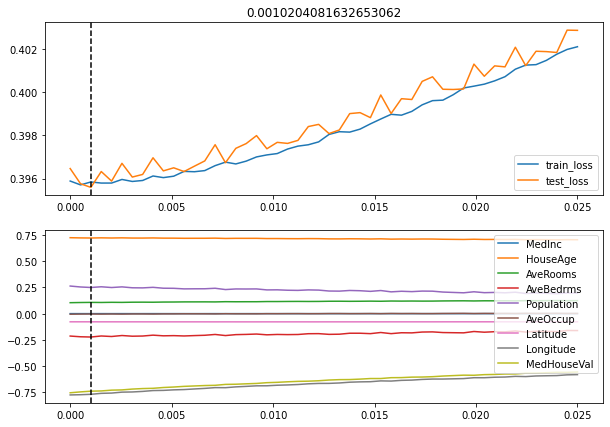

In [82]:
min_i = test_loss.argmin()

plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.plot(penalties, train_loss, label='train_loss')
plt.plot(penalties, test_loss, label= 'test_loss')
plt.axvline(x=penalties[min_i], linestyle='dashed', c='k')
plt.title(penalties[min_i])
plt.legend();

plt.subplot(2,1,2)
plt.plot(penalties, theta, label=cols)
plt.legend(loc='upper right')
plt.axvline(x=penalties[min_i], linestyle='dashed', c='k')

And the coefficients associated are

In [83]:
theta.loc[min_i]

Intercept     0.000149
MedInc        0.719649
HouseAge      0.107117
AveRooms     -0.222413
AveBedrms     0.248938
Population   -0.003237
AveOccup     -0.077706
Latitude     -0.767439
Longitude    -0.737610
Name: 2, dtype: float64